# A mathematical aside: Biased versus unbiased autocovariance

Autocovariance is defined by the equation

<a id="eq:3.3"></a>
$$r_{xx}[L] = \frac{1}{N}\sum_{n=1}^{N-L}(x_{n+L} - \bar x)(x_n - \bar x).$$


This is a biased estimate of the true autocovariance. To compute an *unbiased* measure of the autocovariance we replace the $1/N$ term with $1/(N-L)$. 
    
$$r^*_{xx}[L] = \frac{1}{N - L}\sum_{n=1}^{N-L}(x_{n+L} - \bar x)(x_n - \bar x).$$


To examine the difference in the biased versus the unbiased autocovariance, let's compute both for the EEG data over a broad interval of lags. 

In [1]:
# Prepare the modules and plot settings
import scipy.io as sio
import matplotlib.pyplot as plt
from matplotlib.pyplot import xlabel, ylabel, plot, show, title
from matplotlib import rcParams
import numpy as np
%matplotlib inline

In [3]:
rcParams['figure.figsize'] = (12,3)
rcParams['axes.xmargin'] = 0

In [4]:
# Import the data
data = sio.loadmat('Ch3-EEG-1.mat')  # Load the EEG data
x = data['EEG'].reshape(-1)  # Extract the EEG variable
t = data['t'][0]  # ... and the t variable
N = len(x)
dt = t[1] - t[0]

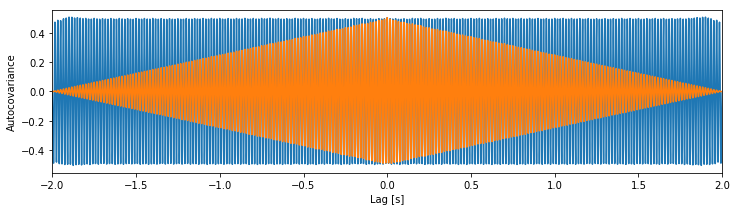

In [5]:
lags = np.arange(-N + 1, N)  # Get the lags
# Calculate non-normalized autocovariance
ac = np.correlate(x - x.mean(), x - x.mean(), mode="full")  
ac_b = 1 / N * ac  # Calculate biased autocovariance
ac_u = 1 / (N - np.abs(lags)) * ac  # ... and unbiased autocovariance
plot(lags * dt, ac_u)  # ... plot them
plot(lags * dt, ac_b)
xlabel('Lag [s]')  # ... and label the axes
ylabel('Autocovariance')
show()

We see the similarities and differences between these two estimates. At small lags (near 0 s), the biased and unbiased estimates of the autocovariance are similar. In this case, $L$ is small, so the factor 1/(N − L) in the unbiased estimate is similar to the factor of 1/N in the biased estimate. At large lags (away from 0 s), the biased and unbiased estimates of the autocovariance are quite different. Notice that, as L approaches ±2 s, the biased estimate (orange curve) approaches zero.

Compare this observation to the *unbiased* estimate of the autocovariance. In this example, we see that the unbiased estimate of the autocovariance remains large even as L approaches ± 2 (blue curve).

<div class="alert alert-block alert-info">
**Q.** Why does the biased estimate of the autocovariance approach 0 at large lags? <br><br>

**A.** For concreteness, let's consider the case when $L = N - 2$. In this case, $L$ is large, and nearly equal to the number of points in the data ($N$). When $L$ is large, we shift the time series $x$ so that only a subset of indices overlap; the following is a cartoon representation of the $L = 2$ case:
![cartoon representation f L=2 autocovariance](imgs/3-3d.png)
Now consider the extension to $L=N-2$. Because we only compute the product

$$(x_{n+L} - \bar x)(x_n - \bar x)$$

for the overlapping indices of $x_n$ and $x_{n+L}$, we only include two terms in the  summation (<a href="#eq:3.3" class="thumb">eq.<span><img src="imgs/eq3-3.png"></span></a>). The sum of these two terms is then divided by $N$, which results in a small number that approaches zero as L approaches N.
</div>

<div class="alert alert-block alert-info">
**Q.** Why does the unbiased estimate of the autocovariance remain large at large lags? <br><br>

**A.** As in the biased case, let's again consider $L = N-2$. In this case, $L$ is large, and we shift the time series $x$ so that only a subset of indices overlap. Therefore, the product

$$(x_{n+L} - \bar x)(x_n - \bar x)$$

again only includes two terms in the autocovariance summation (<a href="#eq:3.3" class="thumb">eq.<span><img src="imgs/eq3-3.png"></span></a>). However, in the unbiased case, the sum of these terms is divided by $N - L = N - (N - 2) = 2$; notice that as $L$ approaches $N$, the term $N - L$ approaches zero. In this case, we find a "balance" between the summation of two terms then a division by the number of terms in the sum (in this example, division by 2). This balance allows the unbiased estimate of the autocovariance to remain large as $L$ approaches $N$.

Careful inspection of the blue curve reveals another feature of the biased estimate; the estimated values at large lags become more variable (look carefully at lags near ±1.75 s and beyond). 

![plot with large lags highlighted](imgs/3-5highlight.png "The autocovariance of the EEG for the biased (orange) and unbiased (blue) estimates over a wide range of lags.")

Increased variability at large lags occurs because, as $L$ approaches $N$, we have less data to compare in the assessment of the autocovariance. Notice that, when $L = N − 1$, the estimate of the autocovariance utilizes only two data points from $x$ (i.e., the product consists only of one term: $(x_N - \bar x)(x_1 - \bar x)$). We do not expect a reliable assessment of associations in the data with so few data points to compare.
</div>

With those observations, should we use the biased or unbiased estimator of the autocovariance? Statisticians typically prefer the biased estimator for a variety of reasons ([Percival & Walden, 2009](https://www.cambridge.org/core/books/spectral-analysis-for-physical-applications/A9195239A8965A2C53D43EB2D1B80A33)). First, for many stationary processes, the mean squared error of the biased estimator is smaller than that of the unbiased estimator. The mean squared error depends on both the variance and bias of the estimator:

$$\mbox{mean squared error} = \mbox{variance + (bias)}^2.$$

Although the biased estimator is "biased", the variability of the unbiased estimator is more harmful. We saw a hint of this increased variability in the unbiased estimator at large lags. To make this observation more explicit, let's consider the lag $L = N - 1$, and compute the expression for the biased estimator (<a href="#eq:3.3" class="thumb">eq.<span><img src="imgs/eq3-3.png"></span></a>),

<p title="Variance of the biased estimator with lag N-1">
\begin{eqnarray} 
r_{xx}[N-1] &=& \frac{1}{N} \sum_{n = 1}^{N - (N - 1)} (x_{n + (N - 1)} - \bar x)(x_n - \bar x),\\
&=&\frac{1}{N}\sum_{n=1}^1(x_{n+(N-1)} - \bar x)(x_n - \bar x), \\
&=&\frac{1}{N}(x_{N} - \bar x)(x_1 - \bar x).
\end{eqnarray}
</p>

The expression for the unbiased estimator (<a href="#eq:3.3" class="thumb">eq.<span><img src="imgs/eq3-4.png"></span></a>) becomes,

<p title="Variance of the unbiased estimator with lag N-1">
\begin{eqnarray}
r_{xx}^*[N-1] &=& \frac{1}{N - (N - 1)}\sum_{n=1}^{N - (N-1)}(x_{n+N-1} - \bar x)(x_n - \bar x), \\
&=& \sum_{n=1}^1(x_{n+N-1} - \bar x)(x_n - \bar x), \\
&=& (x_{N} - \bar x)(x_1 - \bar x), \\
\end{eqnarray}
</p>

These two expressions reveal that, at a large lag $L = N − 1$, the variance of the unbiased estimator is $N^2$ times the variance of the biased estimator. The dramatic increase in variance of the unbiased estimator leads to unreliable estimates of the autocovariance at large lags. Also, we note that the biased estimator behaves "nicely" as $L$ increases to $N$; we see from the expression for the biased estimator that $r_{xx}[N − 1]$ approaches 0 when $N$ is large. This is arguably the behavior we want; we have few data points to compare at large lags, and therefore an unreliable estimate of the autocovariance, so we’re better off disregarding these values. For these reasons, we’ll use the biased estimator; in this estimate, autocovariance values at large lags - which utilize less data and are typically noisier - are reduced.

We note that, for the EEG data of interest here, the unbiased estimator outperforms the biased estimator. For these data, which are dominated by a 60 Hz rhythm, there is significant autocovariance even at long lags. In this case, the biased estimator leads to an interpretation of decreasing autocovariance, even though that is not true. However, for most brain signal (not saturated by 60 Hz line noise), we expect the autocovariance to decrease in time.

In [1]:
from IPython.core.display import HTML
HTML('../style.css')